In [3]:
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import torch
from torch import nn
import tqdm

train_dataset = FashionMNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
valid_dataset = FashionMNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())

In [4]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=256,
                                          shuffle=True, num_workers=2)
validLoader = torch.utils.data.DataLoader(valid_dataset, batch_size=256,
                                          shuffle=True, num_workers=2)

In [5]:
# train_dataset[0]
train_dataset[0][0].shape # 28 x 28 representation of the first image in training data
train_dataset[0][1] # label of the first image of the training data

9

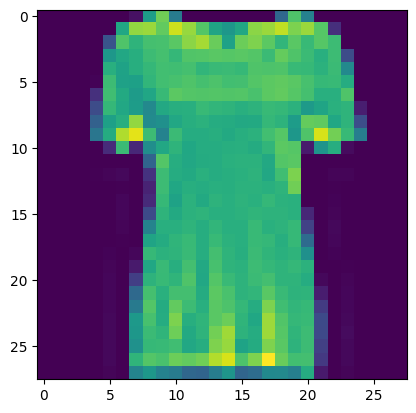

In [6]:
# visualize the images
import matplotlib.pyplot as plt

plt.imshow(train_dataset[10][0][0])

In [ ]:
# 3 most common CNN architectures
# 1. AlexNet
# 2. GoogleNet
# 3. ResNet

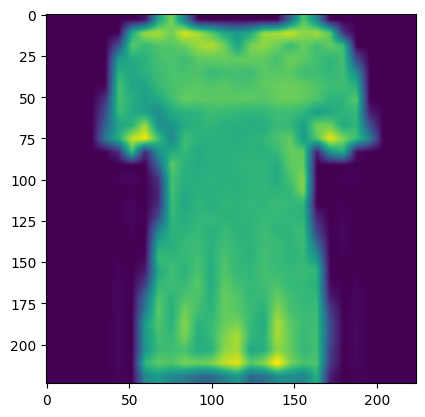

In [7]:
# TRANSFORMS TO 224x224x3
alex_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])

train_dataset = FashionMNIST(root="./data", train=True, download=True, transform=alex_transforms)
valid_dataset = FashionMNIST(root="./data", train=False, download=True, transform=alex_transforms)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=256,
                                          shuffle=True, num_workers=2)
validLoader = torch.utils.data.DataLoader(valid_dataset, batch_size=256,
                                          shuffle=True, num_workers=2)


plt.imshow(train_dataset[10][0][0])

In [8]:
# AlexNet

# reload in the data

alex = nn.Sequential(
    # nn.Conv2d(1, 6, 5, padding="same"),
    nn.Conv2d(in_channels=3, out_channels=96, kernel_size=(11, 11), stride=4, padding="valid"),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(3,3), stride=2),

    nn.Conv2d(in_channels=96, out_channels=256, kernel_size=(5, 5), stride=1, padding="same"),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(3,3), stride=2),


    nn.Conv2d(in_channels=256, out_channels=384, kernel_size=(3, 3), stride=1, padding="same"),
    nn.ReLU(),


    nn.Conv2d(in_channels=384, out_channels=384, kernel_size=(3, 3), stride=1, padding="same"),
    nn.ReLU(),


    nn.Conv2d(in_channels=384, out_channels=256, kernel_size=(3, 3), stride=1, padding="same"),
    nn.ReLU(),

    nn.MaxPool2d(kernel_size=(3,3), stride=2),

    nn.Flatten(),
    nn.Linear(6400, 4096),
    nn.Linear(4096, 10),

)

In [10]:
from fastprogress.fastprogress import master_bar, progress_bar
import matplotlib.pyplot as plt

def runModel(train_loader,valid_loader, epochs, model, criterion):
    optimizer = torch.optim.Adam(model.parameters(), lr=.001)
    # A master bar for fancy output progress
    # mb = master_bar(range(epochs))

    # # Information for plots
    # mb.names = ["Train Loss", "Valid Loss"]
    train_losses = []
    # valid_losses = []

    train_correct = []
    for i in range(epochs):

        # model.train()

        # train_N = len(train_loader.dataset)
        # num_train_batches = len(train_loader)
        # train_dataiterator = iter(train_loader)

        # train_loss_mean = 0

        trn_corr = 0

        #train
        for b, (X_train, y_train) in enumerate(tqdm.tqdm(train_loader)):
            b+=1
            y_pred = model(X_train)
            loss = criterion(y_pred, y_train)

            predicted = torch.max(y_pred.data, 1)[1]
            batch_corr = (predicted == y_train).sum()
            trn_corr += batch_corr
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if b%600 == 0:
                print(f'Epoch: {i} Batch: {b} Loss: {loss.item}')
            
            train_losses.append(loss)
            train_correct.append(trn_corr)
        
        #validation
        
        


runModel(train_loader=trainloader, valid_loader=validLoader, epochs=5, model=alex, criterion=nn.CrossEntropyLoss())      

  0%|          | 1/235 [00:10<42:17, 10.84s/it]


KeyboardInterrupt: 